<a href="https://colab.research.google.com/github/RitwizSarma/placement-projects/blob/main/ClusterAnalysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using USML for Credit Risk Analysis of Unbanked People

Credit serves many roles: it can be a lifeline during times of need, a security blanket in risky circumstances, and a springboard to entrepreneurship. However, quotidian mechanisms of credit risk analysis gatekeep access to credit from numerous sections of society. This computational notebook uses large unit-level data on rural individuals to design an approachable, low-compute AI-enabled method of extending credit risk analysis to unbanked people<sup>1</sup>.

> <i>"Financial inclusion means that everyone, regardless of their background or income level, has access to the tools they need to manage their money and build a better future."</i> - Sheryl Sandberg, COO of Facebook

The most popular machine learning techniques are generally supervised; i.e., they are dependent upon target labels being present in training data. Since unbanked people are by definition unlikely to have a financial record, we make use of an unsupervised machine learning algorithm called **K-means clustering**. We specify an optimal value for $k$ using evaluation metrics such as the *within-cluster sum of squares* and *silhouette score*. We then validate our clustering approach using the defaulter labels present within the data.



<small><small>1. The word 'unbanked' refers to people who do not have money deposited in a bank ([Merriam-Webster](https://www.merriam-webster.com/dictionary/unbanked)).

## Importing dependencies and data

In [17]:
import pandas as pd
import numpy as np
import seaborn
import sklearn.datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
seaborn.set_theme(palette='husl')

### Example datasets

#### Iris

In [20]:
iris = sklearn.datasets.load_iris()

In [21]:
data = iris.data

#### Blobs

In [18]:
blobX, blobY = sklearn.datasets.make_blobs(n_samples=200, n_features=3, centers=5, cluster_std=1.8)

[Text(-15.0, 0, ''),
 Text(-10.0, 0, ''),
 Text(-5.0, 0, ''),
 Text(0.0, 0, ''),
 Text(5.0, 0, ''),
 Text(10.0, 0, ''),
 Text(15.0, 0, '')]

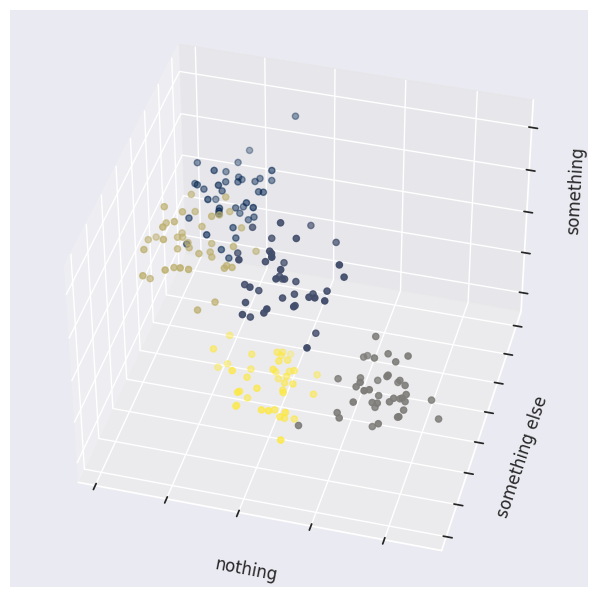

In [16]:
plt.figure(figsize=(20, 7.5))
ax = plt.subplot(1, 1, 1, projection='3d', elev=40, azim=285)
ax.scatter(blobX[:, 0], blobX[:, 1], blobX[:, 2], c=blobY, cmap='cividis')
ax.set_xlabel('nothing')
ax.set_ylabel('something else')
ax.set_zlabel('something')
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

### Stata dataset

## Exploratory data analysis and data cleaning

## Model and evaluation

In [ ]:
results = {}

for i in range(2, 30):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    wcss = kmeans.inertia_
    labs = kmeans.labels_
    sil = sklearn.metrics.silhouette_score(data, labs)
    results[i] = {'wcss':wcss, 'silhouette':sil}

There are several methods

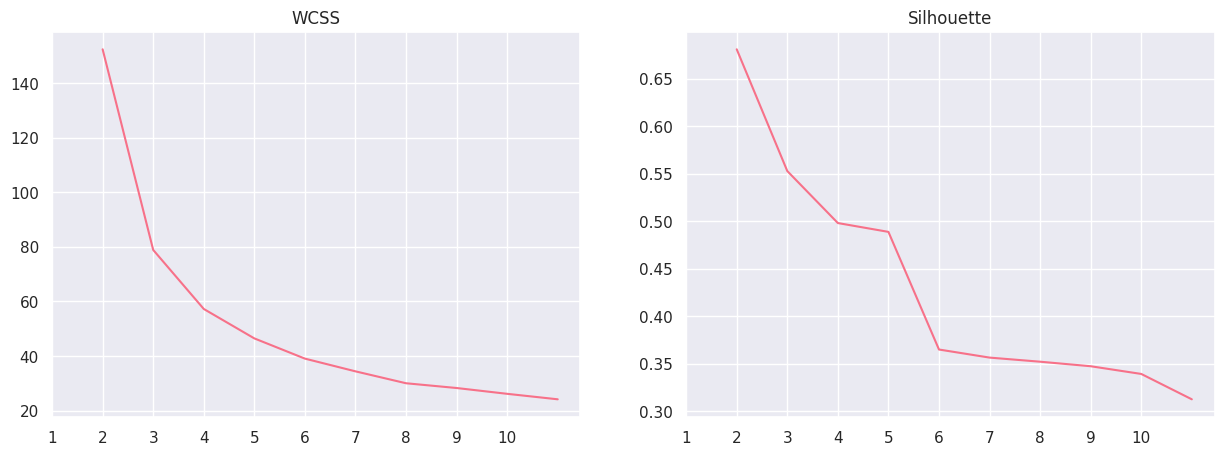

In [25]:
wcss_l = [value.get('wcss', None) for value in results.values()]
silh_l = [value.get('silhouette', None) for value in results.values()]

fig, axs = plt.subplots(ncols=2, figsize=(15, 5))
axs[0].plot(list(results.keys())[:10], wcss_l[:10])
axs[1].plot(list(results.keys())[:10], silh_l[:10])
axs[0].set_title("WCSS")
axs[1].set_title("Silhouette")
for ax in axs:
  ax.set_xticks(range(1, 11, 1))

So, selecting three (3) as our $k$,